In [ ]:
#import the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#data for employees

data = {
    "Employee ID" : [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116],
    "Name" : ["Aaron", "Brad", "Bridgette", "Nicole", "Clint", "Deb", "Amber", "Drew", "Oscar", "Terry", "Trick", "Harold", "Joey", "Nico", "Pickles", "Ruby"],
    "Department" : ["Server", "Server", "Server", "Server", "Barstaff", "Barstaff", "FOH", "FOH", "FOH", "FOH", "FOH", "Kitchen", "Kitchen", "Kitchen", "Kitchen", "Kitchen"],
    "Salary" : [74000, 91000, 68000, 96000, 97000, 102000, 54000, 63000, 61000, 83000, 78000, 58000, 88000, 64000, 64000, 60000],
    "Gender" : ["Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female"],
    "Yrs of Employment" : [2, 7, 3, 6, 4, 9, 3, 9, 4, 11, 1, 6, 7, 4, 4, 3]
}

In [ ]:
#create the dataframe

df = pd.DataFrame(data)
df

,Employee ID,Name,Department,Salary,Gender,Yrs of Employment
0,101,Aaron,Server,74000,Male,2
1,102,Brad,Server,91000,Male,7
2,103,Bridgette,Server,68000,Female,3
3,104,Nicole,Server,96000,Female,6
4,105,Clint,Barstaff,97000,Male,4
5,106,Deb,Barstaff,102000,Female,9
6,107,Amber,FOH,54000,Female,3
7,108,Drew,FOH,63000,Male,9
8,109,Oscar,FOH,61000,Male,4
9,110,Terry,FOH,83000,Male,11


In [8]:
#grouped departments by sum of salary

grouped_dept = df.groupby("Department").agg({"Salary" : "sum"})
grouped_dept = grouped_dept.reset_index()
grouped_dept

,Department,Salary
0,Barstaff,199000
1,FOH,339000
2,Kitchen,334000
3,Server,329000


<Axes: title={'center': 'Salary by Department'}, ylabel='Salary'>

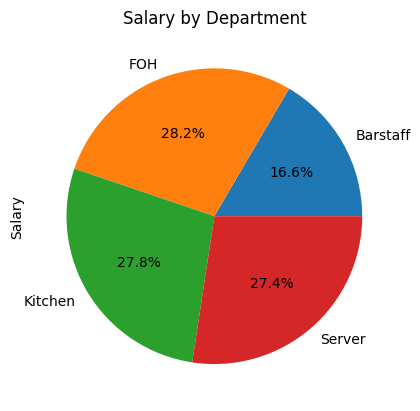

In [ ]:
#Plot 1 is Pie chart of grouped departments by sum of salary in pandas

grouped_dept.plot(kind="pie",
                  y="Salary",
                  labels=grouped_dept["Department"],
                  title="Salary by Department",
                  autopct="%1.1f%%",
                  legend=False
                  )

<Axes: title={'center': 'Salary by Employee'}, xlabel='Name of Employee', ylabel='Salary (USD)'>

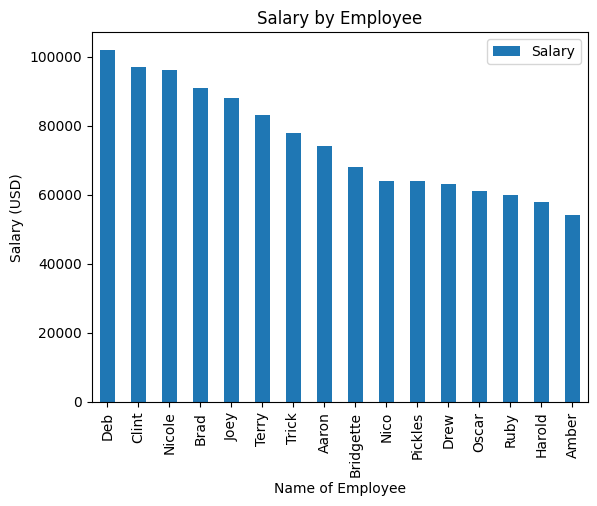

In [16]:
#Sort employees by salary in decending order

decending_salary = df.sort_values(by="Salary", ascending=False)

#Plot 2 is Bar chart of all employees salaries in decending order in pandas

bar_plot = decending_salary.plot(kind="bar", x="Name", y="Salary", title="Salary by Employee",)
bar_plot.set_xlabel("Name of Employee")
bar_plot.set_ylabel("Salary (USD)")
bar_plot